In [353]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.model_selection import train_test_split
from ipywidgets import interact, interact_manual
import os
import io
import re
%matplotlib inline
plt.rcParams['figure.facecolor']='w'
from ipywidgets import interact, interact_manual
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

 **Chargement des données**

In [354]:
data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)

# Description du jeu de données

In [355]:
data.shape

(320772, 162)

In [356]:
data.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

In [357]:
data.sample(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
21309,0024182210453,http://world-fr.openfoodfacts.org/produit/0024...,usda-ndb-import,1489065892,2017-03-09T13:24:52Z,1489065892,2017-03-09T13:24:52Z,"Brown Rice Udon, Wheat Pasta With Brown Rice",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,NaN,NaN
5542,0011150111720,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489053591,2017-03-09T09:59:51Z,1489053591,2017-03-09T09:59:51Z,Lasagna Skillet Dinner,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,NaN,NaN
167805,0863209000154,http://world-fr.openfoodfacts.org/produit/0863...,usda-ndb-import,1489092406,2017-03-09T20:46:46Z,1489092406,2017-03-09T20:46:46Z,Superfood Cereal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,NaN,NaN
288157,7610700001189,http://world-fr.openfoodfacts.org/produit/7610...,openfood-ch-import,1486495604,2017-02-07T19:26:44Z,1487255847,2017-02-16T14:37:27Z,Eucalyptus Bonbons aux herbes,NaN,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN
32332,0036632037367,http://world-fr.openfoodfacts.org/produit/0036...,usda-ndb-import,1489056803,2017-03-09T10:53:23Z,1489056803,2017-03-09T10:53:23Z,"Light & Fit, Greek Nonfat Yogurt, Peach",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,-3.0,NaN,NaN


In [358]:
data.describe(include='all')

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,320749,320749,320770,320769,320763,320772,320772,303010,52795,104819,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
unique,320749,320749,3535,189567,189568,180495,180495,221347,38584,13826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489077120,2017-03-09T10:37:09Z,1439141742,2015-08-09T17:35:42Z,Ice Cream,Pâtes alimentaires au blé dur de qualité supér...,500 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,169868,20,20,33,33,410,201,4669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN


In [359]:
data.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

**Existe-t-il des Doublons dans ce jeu de données ?**

In [360]:
data.duplicated().sum()

0

aucun doublon

**Nombre de valeurs manquantes pour chaque colonne**

In [361]:
data.isnull().sum() 

code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

In [362]:
data.isnull().sum() / data.shape[0] * 100.00

code                         0.007170
url                          0.007170
creator                      0.000623
created_t                    0.000935
created_datetime             0.002806
                              ...    
carbon-footprint_100g       99.916452
nutrition-score-fr_100g     31.038245
nutrition-score-uk_100g     31.038245
glycemic-index_100g        100.000000
water-hardness_100g        100.000000
Length: 162, dtype: float64

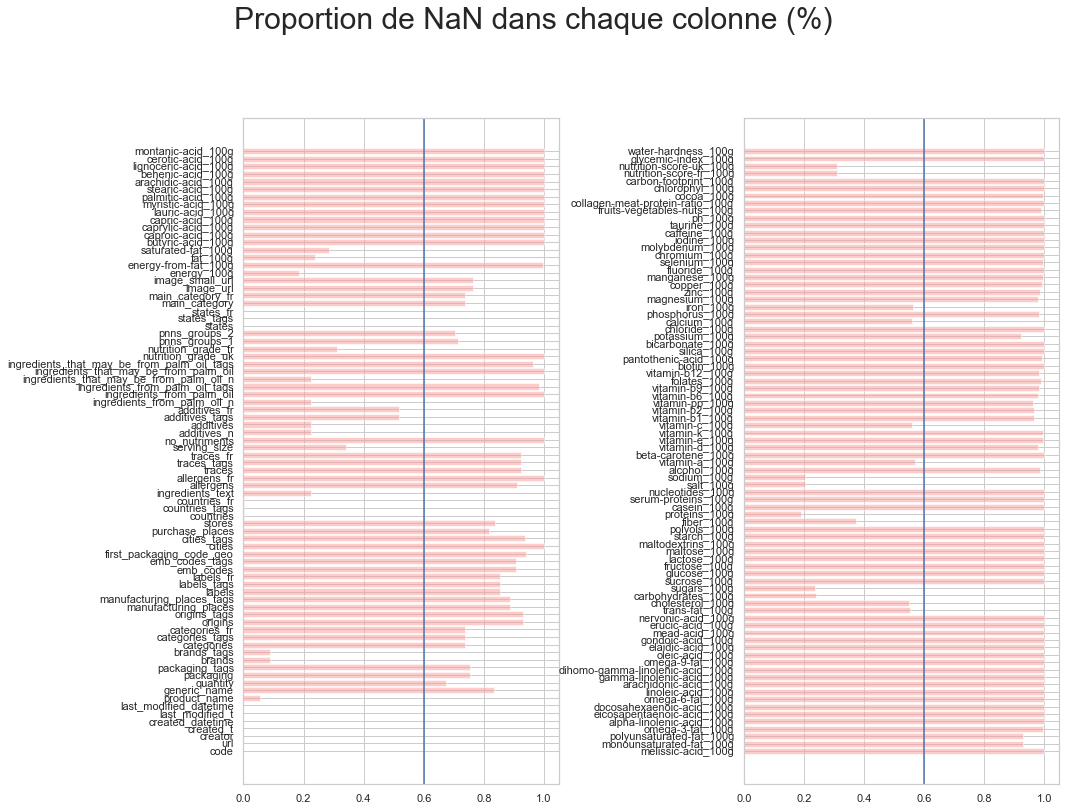

In [363]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))
fig.suptitle("Proportion de NaN dans chaque colonne (%)", size=30)

count = data.isnull().mean(axis=0)
ax1.barh(y=count[:80].index, width=count[:80].values, color='#FB9A99', alpha=0.5)
ax1.axvline(x=0.6)
ax2.barh(y=count[80:].index, width=count[80:].values, color='#FB9A99', alpha=0.5)
ax2.axvline(x=0.6)

plt.tight_layout(w_pad=0,pad=5)
plt.show()

/Users/soraya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


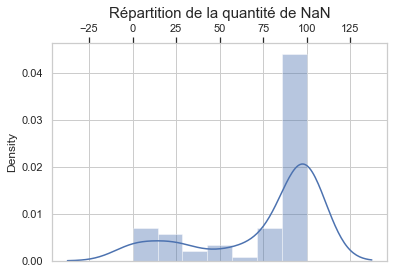

In [364]:
proportion_nan = data.isna().sum().divide(data.shape[0]/100).sort_values(ascending=False)
sns.set(style="whitegrid")
ax = sns.distplot(proportion_nan.values)
ax.xaxis.set_ticks_position('top')
plt.title('Répartition de la quantité de NaN', size=15)
plt.show()

In [365]:
# Nb total et pourcentage de NAN

def print_null_pct(data):
    tot_null = data.isna().sum().sum()
    print('nb of null: ', tot_null, '\npct of null: ',
        '{:.1f}'.format(tot_null*100/(data.shape[0]*data.shape[1])))

print_null_pct(data)

nb of null:  39608589 
pct of null:  76.2


**Suppression des features avec plus de 80% de valeurs manquantes**

In [366]:
threshold = 0.2 * data.shape[0]

data = data.dropna(axis=1, thresh=threshold)

In [367]:
print(data.columns)

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'countries', 'countries_tags',
       'countries_fr', 'ingredients_text', 'serving_size', 'additives_n',
       'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g', 

In [368]:
data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,1kg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,1,Plastique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,Plastique,...,0.0,0.00,0.00000,0.000,0.0,0.0000,0.000,0.00000,0.0,0.0
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,50 g,Plastique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,67g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [369]:
data.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_fr',
 'main_category',
 'main_category_fr',
 'image_url',
 'image_small_url',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

# Sélection des features pertinentes

In [370]:
data= data.loc[: , ['product_name', 'brands', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'fat_100g',
  'saturated-fat_100g', 'trans-fat_100g','cholesterol_100g','carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g','sodium_100g', 'energy_100g' ] ]
data

,product_name,brands,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,nutrition-score-fr_100g,nutrition-score-uk_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,energy_100g
0,Farine de blé noir,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,d,NaN,NaN,14.0,14.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,2243.0
2,Peanuts,Torn & Glasser,b,NaN,NaN,0.0,0.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,1941.0
3,Organic Salted Nut Mix,Grizzlies,d,NaN,NaN,12.0,12.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,2540.0
4,Organic Polenta,Bob's Red Mill,NaN,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,1552.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,Tomato & ricotta,Panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,b,NaN,NaN,0.0,0.0,0.00,0.00,0.0,0.000,0.00,0.00,0.0,0.00,0.00000,0.000,0.0
320769,乐吧泡菜味薯片,乐吧,NaN,Salty snacks,Appetizers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,Tomates aux Vermicelles,Knorr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Traitement des colonnes semblables

**a/ Catégories d'un produit pnns_groups_1 et pnns_groups_2**

In [371]:
data.pnns_groups_1.value_counts()

unknown                    22624
Sugary snacks              12368
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8442
Fish Meat Eggs              8041
Composite foods             6747
Fruits and vegetables       5908
Fat and sauces              5216
Salty snacks                2809
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes          16
salty-snacks                   1
Name: pnns_groups_1, dtype: int64

In [372]:
data.pnns_groups_2.value_counts()

unknown                             22624
One-dish meals                       5546
Sweets                               4698
Biscuits and cakes                   4561
Non-sugared beverages                4302
Cereals                              4106
Cheese                               4024
Dressings and sauces                 3602
Milk and yogurt                      3297
Processed meat                       3247
Chocolate products                   3109
Alcoholic beverages                  2909
Vegetables                           2840
Fish and seafood                     2638
Sweetened beverages                  2170
Appetizers                           2101
Fruits                               2068
Fruit juices                         1924
Bread                                1838
Meat                                 1694
Fats                                 1614
Breakfast cereals                    1408
vegetables                            934
Legumes                           

In [373]:
categories = data[['pnns_groups_1', 'pnns_groups_2']]

In [374]:
print("Nombre de catégories différentes:")
for col in categories:
    print(f"{col} : {len(categories[col].value_counts())}")

Nombre de catégories différentes:
pnns_groups_1 : 14
pnns_groups_2 : 42


pnns_groups_1' semble être le meilleur choix avec un nombre de catégories plus réduit, ce qui permettra éventuellement de faire des analyses dessus.

In [375]:
data['pnns_groups_1'].value_counts()

unknown                    22624
Sugary snacks              12368
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8442
Fish Meat Eggs              8041
Composite foods             6747
Fruits and vegetables       5908
Fat and sauces              5216
Salty snacks                2809
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes          16
salty-snacks                   1
Name: pnns_groups_1, dtype: int64

In [376]:
# Pour harmoniser les catégories
data['pnns_groups_1'] = data['pnns_groups_1'].replace(
    'fruits-and-vegetables', 'Fruits and vegetables').replace(
    'sugary-snacks', 'Sugary snacks').replace(
    'cereals-and-potatoes', 'Cereals and potatoes').replace(
    'salty-snacks', 'Salty snacks')

In [377]:
data['pnns_groups_1'].value_counts()

unknown                    22624
Sugary snacks              12864
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8458
Fish Meat Eggs              8041
Fruits and vegetables       6895
Composite foods             6747
Fat and sauces              5216
Salty snacks                2810
Name: pnns_groups_1, dtype: int64

In [378]:
data = data.drop(['pnns_groups_2'], axis=1)
data.shape

(320772, 17)

In [379]:
# changer le nom de quelque colonnes
data.rename(columns={'pnns_groups_1': 'pnns1',
                   'nutrition-score-fr_100g':'nutriscore_fr'},
          inplace=True)


**b/ Entre les scores nutritionnels FR et UK**

Il existe deux colonnes: 'nutrition-score-fr_100g' et 'nutrition-score-uk_100g' qui sont très proches mais utilisent un barème un peu différent.

In [380]:
mask = data['nutriscore_fr'] == data['nutrition-score-uk_100g']

print(f"Les 2 scores sont identiques dans "
      f"{len(data[mask])/data.shape[0]*100:.2f}% des cas")

Les 2 scores sont identiques dans 66.37% des cas


Le score nutritionnel français étant plus adapté au marché français, nous conserverons celui-là.

In [381]:
data = data.drop(['nutrition-score-uk_100g'], axis=1)
data.shape


(320772, 16)

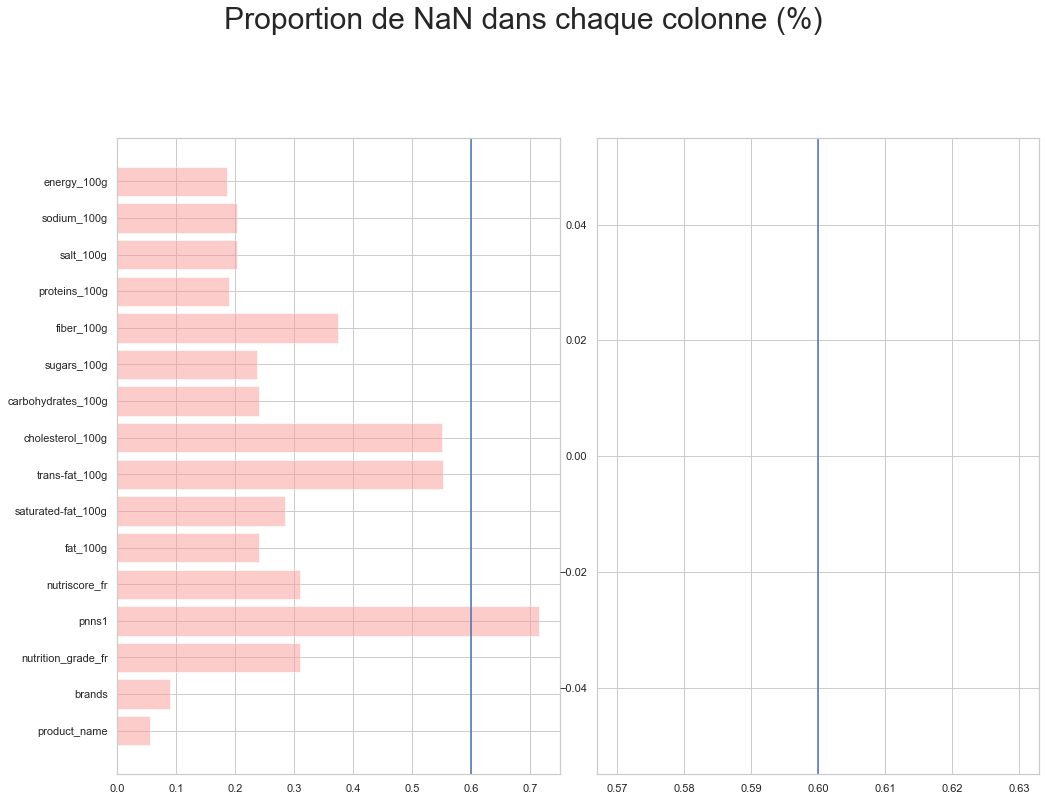

In [382]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))
fig.suptitle("Proportion de NaN dans chaque colonne (%)", size=30)

count = data.isnull().mean(axis=0)
ax1.barh(y=count[:80].index, width=count[:80].values, color='#FB9A99', alpha=0.5)
ax1.axvline(x=0.6)
ax2.barh(y=count[80:].index, width=count[80:].values, color='#FB9A99', alpha=0.5)
ax2.axvline(x=0.6)

plt.tight_layout(w_pad=0,pad=5)
plt.show()

 # Traitement des valeurs aberrantes (outliers)

In [383]:
data.describe(include='all')

,product_name,brands,nutrition_grade_fr,pnns1,nutriscore_fr,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,energy_100g
count,303010,292360,221210,91513,221210.000000,243891.000000,229554.000000,143298.000000,144090.000000,243588.000000,244971.000000,200886.000000,259922.000000,255510.000000,255463.000000,2.611130e+05
unique,221347,58784,5,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ice Cream,Carrefour,d,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,410,2978,62763,22624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,9.165535,12.730379,5.129932,0.073476,0.020071,32.073981,16.003484,2.862111,7.075940,2.028624,0.798815,1.141915e+03
std,NaN,NaN,NaN,NaN,9.055903,17.578747,8.014238,1.540223,0.358062,29.731719,22.327284,12.867578,8.409054,128.269454,50.504428,6.447154e+03
min,NaN,NaN,NaN,NaN,-15.000000,0.000000,0.000000,-3.570000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,0.000000e+00
25%,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,3.770000e+02
50%,NaN,NaN,NaN,NaN,10.000000,5.000000,1.790000,0.000000,0.000000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,1.100000e+03
75%,NaN,NaN,NaN,NaN,16.000000,20.000000,7.140000,0.000000,0.020000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,1.674000e+03


**Examinons la distribution des valeurs pour les colonnes _100g.**

In [384]:
X_100g_cols = data.columns[(data.columns.str.contains('_100g'))&\
                         ~(data.columns.str.contains('energy'))]

@interact_manual
def plot_box_xlim(xmax=(10,1000,50)):
    data[X_100g_cols].boxplot(vert=False, figsize=(18,10))
    plt.gca().set(xlim=(0,xmax));

interactive(children=(IntSlider(value=460, description='xmax', max=1000, min=10, step=50), Button(description=…

**Nous devons nous débarrasser des valeurs inférieures à 0 et supérieures à 100**

In [385]:
#Changer les valeurs incohérentes en np.nan
for c in X_100g_cols:
    data.loc[:,c] = data[c].where(data[c].between(0,100), other=np.nan)

**La somme de toutes les colonnes X_100g doit être inférieure à 100.**

In [386]:
#les colonnes dont la somme doit être inférieure ou égale à 100
sum_100g_cols = ['fat_100g', 'carbohydrates_100g', 'proteins_100g', 'salt_100g']
#sous-colonnes
fat_cols = [c for c in ['saturated_fat_100g', 'trans-fat_100g', 'cholesterol_100g' ] if c in data.columns]
carb_cols = [c for c in ['sugars_100g','fiber_100g'] if c in data.columns]
salt_cols = ['sodium_100g']

In [387]:
# Vérification des lignes où la somme des composants dépasse le total
print('****  SOUS COLONNES  ****')
# fat_100g
m_fat_out = data['fat_100g']<(data[fat_cols].sum(axis='columns'))
print("'fat_100g'", data[m_fat_out].shape[0])
# carbohydrates_100g
m_carb_out = data['carbohydrates_100g']<(data[carb_cols].sum(axis='columns'))
print("'carbohydrates_100g'", data[m_carb_out].shape[0])
# salt_100g
m_salt_out = data['salt_100g']>(data[salt_cols].sum(axis='columns')/0.387)
print("'sodium_100g'", data[m_salt_out].shape[0])

****  SOUS COLONNES  ****
'fat_100g' 2126
'carbohydrates_100g' 15423
'sodium_100g' 4


In [388]:
# Mettre les sous-colonnes à NaN où (XXX_sum > XXX)
data.loc[:,fat_cols] = data[fat_cols].where(~m_fat_out, other=np.nan)
data.loc[:,carb_cols] = data[carb_cols].where(~m_carb_out, other=np.nan)
data.loc[:,salt_cols] = data[salt_cols].where(~m_salt_out, other=np.nan)

In [389]:
# Vérification des lignes où la somme des composants> 100
m_out = data[sum_100g_cols].sum(axis='columns')>100
m_0 = data[sum_100g_cols].sum(axis='columns')==0
m_0_100 = data[sum_100g_cols].sum(axis='columns').between(0,100)
sum_100g = data[sum_100g_cols].sum(axis='columns')

print('\n****  TOTAL MAIN COLUMNS  ****')
print("nb de ligne ou sum > 100: ", data[sum_100g_cols][m_out].shape[0])
print("nb de ligne ou sum = 0: ", data[sum_100g_cols][m_0].shape[0])
print("nb de ligne ou 0 > sum > 100: ", data[sum_100g_cols][m_0_100].shape[0])


****  TOTAL MAIN COLUMNS  ****
nb de ligne ou sum > 100:  4483
nb de ligne ou sum = 0:  63456
nb de ligne ou 0 > sum > 100:  316289


In [390]:
# Mettre les colonnes où la somme des composants nutritionnels dépasse 100 à NaN
data.loc[:,sum_100g_cols] = data[sum_100g_cols].where(~m_out, other=np.nan)

**Colonnes "énergie_100g" doit etre <3765**

In [391]:
energy_cols=['energy_100g']
nut_comp_cols = ['fat_100g', 'carbohydrates_100g', 'proteins_100g',\
                 'fiber_100g']
main_nut_comp_cols = ['fat_100g','carbohydrates_100g', 'proteins_100g']

[(-100.0, 20000.0)]

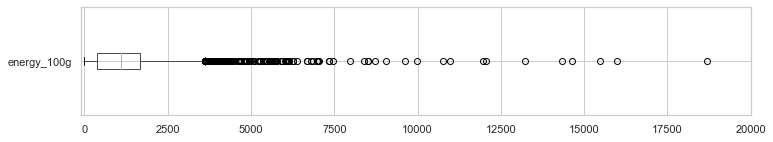

In [392]:
data[energy_cols].boxplot(vert=False, figsize=(12,2));
plt.gca().set(xlim=(-100,20000))

On met à NaN toutes les valeurs non comprises dans [0,3765],un produit ne peut pas être plus énergétique que 100g de matières grasses pures, dont l'énergie pour 100g est de 900kcal ou 3765kJ.

In [393]:
data[data['energy_100g']>4000]

,product_name,brands,nutrition_grade_fr,pnns1,nutriscore_fr,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,energy_100g
772,Ginger Candy Sweetened With Raw Cane,Reed's Inc.,NaN,NaN,NaN,0.0,NaN,NaN,NaN,90.0,90.0,NaN,0.0,0.00000,0.000000,4435.0
5440,Traditional Dusseldorf Mustard,Roundy's,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,3.30200,1.300000,5690.0
14399,Honey Peanuts,Big Y Foods Inc.,e,NaN,20.0,NaN,10.71,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.232000,4335.0
15660,Tamalito Candy,Rainbow Games Inc,e,NaN,21.0,0.0,0.00,0.0,0.0,90.0,80.0,0.0,0.0,0.40640,0.160000,5439.0
19668,Canola & Olive Spray Oil,The Hain Celestial Group Inc.,NaN,NaN,NaN,100.0,0.00,0.0,0.0,0.0,NaN,NaN,0.0,0.00000,0.000000,4184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313506,"Nusco, Chocolate Spread, Chocolate",Brinkers,e,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01016,0.004000,231199.0
313852,Cornetto Mini X8 Fruit,Miko,e,NaN,25.0,NaN,13.00,NaN,NaN,NaN,24.0,0.0,3.7,0.12000,0.047244,5644.0
317171,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,18.1,8.8,NaN,3.8,0.00000,0.000000,87217.0
319695,Miel,Wescobee,e,NaN,20.0,NaN,0.00,NaN,NaN,NaN,82.0,0.0,0.0,0.00000,0.000000,5925.0


In [394]:
#Remplacer les valeurs aberrantes d'énergie non comprises dans [0,3765] par NaN 
print("Total nb de NaN  avant: ", data[energy_cols].isna().sum().sum())
for c in energy_cols:
    data.loc[:,c] = data[c].where(data[c].between(0,3765), other=np.nan)
print("Total nb de NaN  après: ", data[energy_cols].isna().sum().sum())

Total nb de NaN  avant:  59659
Total nb de NaN  après:  60213


[(-100.0, 20000.0)]

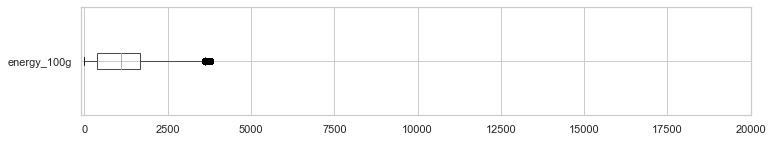

In [395]:
data[energy_cols].boxplot(vert=False, figsize=(12,2));
plt.gca().set(xlim=(-100,20000))

**Calcul d'une valeur energy_kcal_100g à partir des principaux composants nutritionnels :**

L'énergie pour 100 g peut être calculée ou évaluée si les données sur les lipides, les glucides et les protéines (qui sont la principale source d'énergie dans un produit) sont toutes disponibles.

Voyons un aperçu de la quantité de données disponibles dont nous disposons :

In [396]:
''' Fonction pour compter et afficher le nombre de valeurs manquantes '''
def nb_rows_na(data, selcol, how):
  if how == 'all':
    ind = data[data[selcol].isna().all(axis=1)].index
  elif how == 'any':
    ind = data[data[selcol].isna().any(axis=1)].index
  else:
    ind=[]
    print("WARNING: 'how' must be either all or any")
  li_ind = ind.to_list()
  return len(li_ind), li_ind
  
def print_nb_rows_na(data, selcol, how):
  print("- columns: ", selcol, "\nnb of null containing rows (" + how + "): ", nb_rows_na(data, selcol, how)[0])

In [397]:
# énergie pas remplie
# tous les principaux nutriments composants remplis
ind_no_energy = nb_rows_na(data, energy_cols, how='all')[1]
ind_all_comp_filled = data.drop(index=nb_rows_na(data,
                                                 main_nut_comp_cols,
                                                 'any')[1]).index.to_list()
ind_fat_filled = data.dropna(subset=['fat_100g']).index.to_list()
ind_no_en_AND_main_comp_filled = list(set(ind_no_energy) & set(ind_all_comp_filled))
print('energy not filled : {}\nall main nutri components filled : {}'\
      .format(len(ind_no_energy), len(ind_all_comp_filled)))
print('energy not filled BUT all main nutri. comp filled : {}'\
      .format(len(ind_no_en_AND_main_comp_filled)))

energy not filled : 60213
all main nutri components filled : 237207
energy not filled BUT all main nutri. comp filled : 749


On remarque que des lignes n'ont pas de remplissage énergétique. Pour 749 d'entre eux, il sera possible de combler la valeur d'énergie manquante par celle calculée.

In [398]:
# Conversion de la valeur énergétique en calories
data['energy_kcal_100g'] = data['energy_100g'] / 4.184

# 0 - créer un dictionnaire pour les coefficient (kcal/g)
d_kcal = {'fat_100g': 9, 'carbohydrates_100g': 4, 'proteins_100g': 4,\
          'fiber_100g': 1.9}

# 1 - empiler toutes les valeurs _100g
data_temp = data.reset_index().melt(id_vars='index', value_vars=nut_comp_cols,\
                                  var_name='nutri_comp', value_name='kcal_100g')

# 2 - création d'une colonne de coefficients kcal/g
data_temp['coeff'] = (data_temp['nutri_comp'].map(d_kcal)).astype('float64')

# 3 - multiplier les coeffs et _100g
data_temp['calc_energy_kcal_100g'] = data_temp['kcal_100g'].mul(data_temp['coeff'])

# 4 - appliquer les calcule pour chaque produit
calc_en = data_temp.groupby(data_temp['index'])['calc_energy_kcal_100g'].sum()

# 5 -Insertion de la nouvelle colonnes "énergie" dans data, réorganisation des colonnes
data.loc[ind_all_comp_filled,'calc_energy_kcal_100g'] = calc_en
calc_energy_cols=['calc_energy_kcal_100g']
print("Total nb de NaN  avant: ", data[calc_energy_cols].isna().sum().sum())

# 6 - Replacer toutes les valeurs aberrantes par des NaN (un produit ne peut pas être plus énergétique que 100g
# de matières grasses pures, dont l'énergie pour 100g est de 900kcal)
calc_en[~calc_en.between(0,900)] = np.nan
print("Total nb de NaN  après: ", data[calc_energy_cols].isna().sum().sum())

Total nb de NaN  avant:  83565
Total nb de NaN  après:  83565


**Examinons a nouveau la distribution des valeurs pour les colonnes _100g.**

In [399]:
X_100g_cols = data.columns[(data.columns.str.contains('_100g'))&\
                         ~(data.columns.str.contains('energy'))]

@interact_manual
def plot_box_xlim(xmax=(10,1000,50)):
    data[X_100g_cols].boxplot(vert=False, figsize=(18,10))
    plt.gca().set(xlim=(0,xmax));

interactive(children=(IntSlider(value=460, description='xmax', max=1000, min=10, step=50), Button(description=…

[(-100.0, 20000.0)]

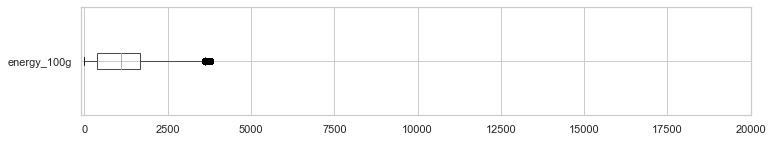

In [400]:
data[energy_cols].boxplot(vert=False, figsize=(12,2));
plt.gca().set(xlim=(-100,20000))

**Colonnes "nutriscore_fr"**

Nutriscore should be between -15 and 40.

count    221210.000000
mean          9.165535
std           9.055903
min         -15.000000
25%           1.000000
50%          10.000000
75%          16.000000
max          40.000000
Name: nutriscore_fr, dtype: float64


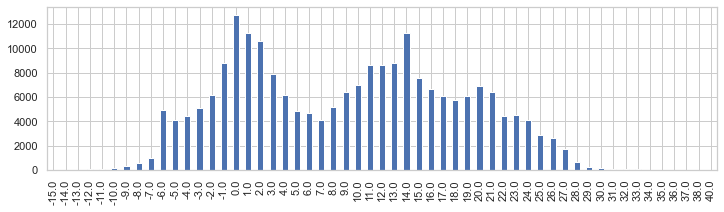

In [401]:
# Vérification des valeurs aberrantes
nut_vals = data['nutriscore_fr'].value_counts().sort_index()
print(data['nutriscore_fr'].describe())
nut_vals.plot.bar()
plt.gcf().set_size_inches(12,3)

toutes les valeur sont comprises entre -15 et 40

# **Traitement des valeurs manquantes:**

**Colonnes "énergie_100g"**

Copier les valeurs calculées (calc_energy_kcal_100g) dans energy_kcal_100g

In [402]:
# Voyons le contenu des deux dernières colonnes.
main_energy_cols=['energy_kcal_100g', 'calc_energy_kcal_100g']
gb = data[main_energy_cols].notna().groupby(main_energy_cols)
display(gb.size())

energy_kcal_100g  calc_energy_kcal_100g
False             False                     59464
                  True                        749
True              False                     24101
                  True                     236458
dtype: int64

In [403]:
# Afficher un échantillon de chaque cas
t_ind=[]
for n, i in gb.groups.items():
      t_ind.append(list(data.loc[i,main_energy_cols].head(1).index))

t_ind = list(np.array(t_ind).reshape(-1))
data.loc[t_ind, main_energy_cols]

,energy_kcal_100g,calc_energy_kcal_100g
0,NaN,NaN
547,NaN,366.80
6,356.118547,NaN
1,536.089866,535.41


In [404]:
energy_cols=['energy_kcal_100g']
print("Total nb de NaN  avant: ", data[energy_cols].isna().sum().sum())

# Copier les valeurs
try:
    ind = gb.get_group((False, True)).index
    data.loc[ind,'energy_kcal_100g'] = data.loc[ind,'calc_energy_kcal_100g']
    print(f"{len(ind)} values de 'calc_energy_kcal_100g' ont été copier sur 'energy_kcal_100g'")
    print("Total nb de NaN  après: ", data[energy_cols].isna().sum().sum())
except:
    print("!!!: check out : this group may not exist")
    

Total nb de NaN  avant:  60213
749 values de 'calc_energy_kcal_100g' ont été copier sur 'energy_kcal_100g'
Total nb de NaN  après:  59464


**Remplacer le reste des valeurs manquantes par la moyenne**

In [405]:
data['energy_kcal_100g'] = data['energy_kcal_100g'].fillna(data['energy_kcal_100g'].mean())

**Colonnes salt_100g**

Corrélation entre 'salt_100g' et 'sodium_100g': 0.9999999972140002


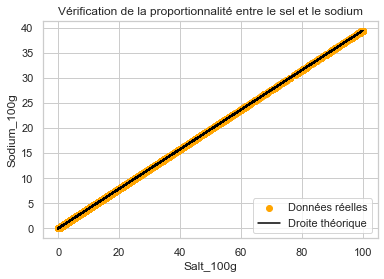

In [406]:
print(f"Corrélation entre 'salt_100g' et 'sodium_100g': {data['salt_100g'].corr(data['sodium_100g'])}")

plt.title('Vérification de la proportionnalité entre le sel et le sodium')
plt.scatter(data['salt_100g'], data['sodium_100g'], color='orange', label='Données réelles')
plt.plot(data['salt_100g'], data['salt_100g'] / 2.54, color='black', label='Droite théorique')
plt.xlabel('Salt_100g')
plt.ylabel('Sodium_100g')
plt.legend(loc='lower right')
plt.show()


Le sel contient 38,7% de sodium. Les valeurs de 'sodium_100g' doivent donc être supérieures à 0,387 fois celles de 'salt_100g'. Nous remplaçons la valeur de la colonne de sel  par la valeur de la colonne de sodium/0,387 Lorsque elle n'est pas renseigné.

In [407]:
# Voyons le contenu des deux colonnes salt_100g et sodium_100g .
main_salt_cols=['salt_100g', 'sodium_100g']
gb = data[main_salt_cols].notna().groupby(main_salt_cols)
display(gb.size())

salt_100g  sodium_100g
False      False           65296
           True             4581
True       False              47
           True           250848
dtype: int64

In [408]:
salt_cols=['salt_100g']
print("Total nb de NaN  avant: ", data[salt_cols].isna().sum().sum())

# Copier les valeurs
try:
    ind = gb.get_group((False, True)).index
    data.loc[ind,'salt_100g'] = data.loc[ind,'sodium_100g']/ 0,387
    print(f"{len(ind)} values de 'sodium_100g' ont été copier sur 'salt_100g'")
    print("Total nb de NaN  après: ", data[salt_cols].isna().sum().sum())
except:
    print("!!!: check out : this group may not exist")
    

Total nb de NaN  avant:  69877
!!!: check out : this group may not exist


/Users/soraya/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


**Remplacer le reste des valeurs manquantes par la médiane de la catégorie Salty snacks**

In [409]:
data.groupby(['pnns1'])['salt_100g'].median()

pnns1
Beverages                  0.010000
Cereals and potatoes       0.430000
Composite foods            0.930000
Fat and sauces             1.270000
Fish Meat Eggs             1.750060
Fruits and vegetables      0.104332
Milk and dairy products    0.152400
Salty snacks               1.422400
Sugary snacks              0.230000
unknown                    0.600000
Name: salt_100g, dtype: float64

In [410]:
data['salt_100g']=data['salt_100g'].fillna(1.422400)

**proteins_100g**

**Remplacer les valeurs manquantes par la moyenne**

In [411]:
data['proteins_100g'] = data['proteins_100g'].fillna(data['proteins_100g'].mean())

**carbohydrates_100g**

In [412]:
# Voyons le contenu des colonnes carbohydrates_100g,sugars_100g et fiber_100g.
main_carbohydrates_cols=['carbohydrates_100g','sugars_100g', 'fiber_100g']
gb = data[main_carbohydrates_cols].notna().groupby(main_carbohydrates_cols)
display(gb.size())

carbohydrates_100g  sugars_100g  fiber_100g
False               False        False          59929
                                 True              85
                    True         False            631
                                 True           21030
True                False        False          29398
                                 True            1730
                    True         False          45255
                                 True          162714
dtype: int64

In [413]:
carbohydrates_cols=['carbohydrates_100g']

print("Total nb de NaN  avant: ", data[carbohydrates_cols].isna().sum().sum())

# 'sugars_100g' and 'fiber_100g' sont remplie
try:
    ind = gb.get_group((False, True, True)).index
    data.loc[ind,'carbohydrates_100g'] = data.loc[ind,'fiber_100g'] + data.loc[ind,'sugars_100g']
    print(f"{len(ind)} values from 'sugars_100g'+'fiber_100g'' successfully copied to 'carbohydrates_100g'")
    
    print("Total nb de NaN  après: ", data[carbohydrates_cols].isna().sum().sum())
except:
    print("!!!: check out : this group may not exist")

Total nb de NaN  avant:  81675
21030 values from 'sugars_100g'+'fiber_100g'' successfully copied to 'carbohydrates_100g'
Total nb de NaN  après:  60645


In [414]:
print("Total nb de NaN  avant: ", data[carbohydrates_cols].isna().sum().sum())

# seulement 'sugars_100g' est remplie
try:
    ind = gb.get_group((False, True, False)).index
    data.loc[ind,'carbohydrates_100g'] = data.loc[ind,'sugars_100g']
    print(f"{len(ind)} values from 'sugars_100g' successfully copied to 'carbohydrates_100g'")
    
    print("Total nb de NaN  après: ", data[carbohydrates_cols].isna().sum().sum())
except:
    print("!!!: check out : this group may not exist")

Total nb de NaN  avant:  60645
631 values from 'sugars_100g' successfully copied to 'carbohydrates_100g'
Total nb de NaN  après:  60014


**Remplacer le reste des valeurs manquantes par la médiane de la catégorie Sugary snacks**

In [415]:
data.groupby(['pnns1'])['carbohydrates_100g'].median()

pnns1
Beverages                   9.8
Cereals and potatoes       63.0
Composite foods            13.2
Fat and sauces              4.6
Fish Meat Eggs              0.9
Fruits and vegetables       7.2
Milk and dairy products     4.8
Salty snacks               51.0
Sugary snacks              58.0
unknown                    18.8
Name: carbohydrates_100g, dtype: float64

In [416]:
data["carbohydrates_100g"]=data["carbohydrates_100g"].fillna(58.0)

**fiber_100g**

In [417]:
data['fiber_100g'] = data['fiber_100g'].fillna(0)

**fat_100g**

In [418]:
# Voyons le contenu des colonnes fat_100g,saturated-fat_100g, trans-fat_100g et cholesterol_100g.
main_fat_cols=['fat_100g','saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g']
gb = data[main_fat_cols].notna().groupby(main_fat_cols)
display(gb.size())

fat_100g  saturated-fat_100g  trans-fat_100g  cholesterol_100g
False     False               False           False                59797
                                              True                    27
                              True            False                   92
                                              True                    21
          True                False           False                17427
                                              True                   145
                              True            False                   80
                                              True                  3770
True      False               False           False                27596
                                              True                  1063
                              True            False                 2269
                                              True                   356
          True                False           False          

In [419]:
fat_cols=['fat_100g']
print("Total nb de NaN  avant: ", data[fat_cols].isna().sum().sum())

# seulemnt 'saturated-fat_100g' est remplie
try:
    ind = gb.get_group(( False, True, False, False)).index
    data.loc[ind,'fat_100g'] = data.loc[ind,'saturated-fat_100g']
    print(f"{len(ind)} values from 'saturated-fat_100g' copied to 'fat_100g'")
    print("Total nb de NaN  après:", data[fat_cols].isna().sum().sum())
except:
    print("!!!: check out : this group may not exist")

Total nb de NaN  avant:  81359
17427 values from 'saturated-fat_100g' copied to 'fat_100g'
Total nb de NaN  après: 63932


In [420]:
print("Total nb de NaN  avant: ", data[fat_cols].isna().sum().sum())

# 'saturated-fat_100g' et 'cholesterol_100g' sont remplie
try:
    ind = gb.get_group((False, True, False, True)).index
    data.loc[ind,'fat_100g'] = data.loc[ind,'saturated-fat_100g'] + data.loc[ind,'cholesterol_100g']
    print(f"{len(ind)} values from 'saturated-fat_100g'+'cholesterol_100g'' successfully copied to 'fat_100g'")
    
    print("Total nb de NaN  après: ", data[fat_cols].isna().sum().sum())
except:
    print("!!!: check out : this group may not exist")

Total nb de NaN  avant:  63932
145 values from 'saturated-fat_100g'+'cholesterol_100g'' successfully copied to 'fat_100g'
Total nb de NaN  après:  63787


In [421]:
print("Total nb de NaN  avant: ", data[fat_cols].isna().sum().sum())

# 'saturated-fat_100g' et 'trans-fat_100g' sont remplie
try:
    ind = gb.get_group((False, True, True, False)).index
    data.loc[ind,'fat_100g'] = data.loc[ind,'saturated-fat_100g'] + data.loc[ind,'trans-fat_100g']
    print(f"{len(ind)} values from 'saturated-fat_100g'+'trans-fat_100g'' successfully copied to 'fat_100g'")
    
    print("Total nb de NaN  après: ", data[fat_cols].isna().sum().sum())
except:
    print("!!!: check out : this group may not exist")

Total nb de NaN  avant:  63787
80 values from 'saturated-fat_100g'+'trans-fat_100g'' successfully copied to 'fat_100g'
Total nb de NaN  après:  63707


In [422]:
print("Total nb de NaN  avant: ", data[fat_cols].isna().sum().sum())

# 'saturated-fat_100g' et 'trans-fat_100g' sont remplie
try:
    ind = gb.get_group((False, True, True, True)).index
    data.loc[ind,'fat_100g'] = data.loc[ind,'saturated-fat_100g'] + data.loc[ind,'trans-fat_100g']+ data.loc[ind,'cholesterol_100g']
    print(f"{len(ind)} values from 'saturated-fat_100g'+'trans-fat_100g'+'cholesterol_100g' successfully copied to 'fat_100g'")
    
    print("Total nb de NaN  après: ", data[fat_cols].isna().sum().sum())
except:
    print("!!!: check out : this group may not exist")

Total nb de NaN  avant:  63707
3770 values from 'saturated-fat_100g'+'trans-fat_100g'+'cholesterol_100g' successfully copied to 'fat_100g'
Total nb de NaN  après:  59937


**Remplacer le reste des valeurs manquantes par la médiane de la catégorie Fat and sauces**

In [423]:
data.groupby(['pnns1'])['fat_100g'].median()

pnns1
Beverages                   0.00
Cereals and potatoes        2.70
Composite foods             6.50
Fat and sauces             25.20
Fish Meat Eggs             11.00
Fruits and vegetables       0.40
Milk and dairy products    10.00
Salty snacks               29.45
Sugary snacks              20.80
unknown                     7.00
Name: fat_100g, dtype: float64

In [424]:
data["fat_100g"]=data["fat_100g"].fillna(25.20)

**saturated_fat_100g et sugars_100g**

supprimons les lignes avec des NAN au niveau de saturated_fat_100g et sugars_100g car, les remplacer par la médiane, la moyenne ou zero représente un risque considerable pour les personnes souffrants de certaines maladies comme le diabète .

In [425]:
data=data.dropna(subset=['saturated-fat_100g','sugars_100g'])


**Suppression des lignes inopérantes**

In [426]:
# Suppression des colonnes qui ne seront plus utilisées
data = data.drop(columns=['sodium_100g', 'trans-fat_100g', 'cholesterol_100g','calc_energy_kcal_100g','energy_100g'])

**Valeur manquantes**

In [427]:
data.isnull().sum() 

product_name            2350
brands                  4093
nutrition_grade_fr      1965
pnns1                 153873
nutriscore_fr           1965
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
energy_kcal_100g           0
dtype: int64

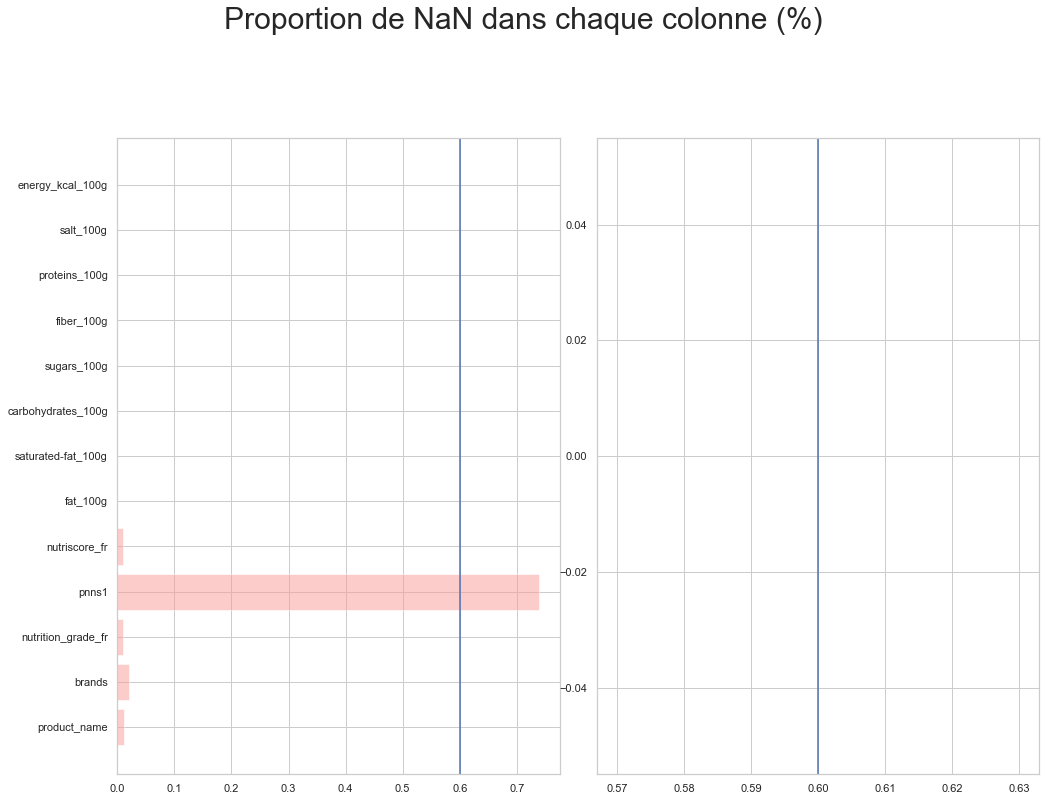

In [428]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))
fig.suptitle("Proportion de NaN dans chaque colonne (%)", size=30)

count = data.isnull().mean(axis=0)
ax1.barh(y=count[:80].index, width=count[:80].values, color='#FB9A99', alpha=0.5)
ax1.axvline(x=0.6)
ax2.barh(y=count[80:].index, width=count[80:].values, color='#FB9A99', alpha=0.5)
ax2.axvline(x=0.6)

plt.tight_layout(w_pad=0,pad=5)
plt.show()

In [429]:
print(data.shape)
print_null_pct(data)

(208494, 13)
nb of null:  164246 
pct of null:  6.1


# Sauvegarde du dataset cleané

In [430]:
data.to_csv('data.csv', index=False)